**Задание
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: 
    strategy, maxiter, popsize, tol, mutation, recombination и updating.**


In [294]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from sympy import diff, symbols

In [295]:
x = symbols('x ')

In [296]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [297]:
def nit_(x,strat):
    result = differential_evolution(ackley, bounds,strategy = strat, seed=42)
    y = result['nit']
    return y
    

In [298]:
strat = ('best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp',
         'randtobest1bin', 'currenttobest1bin', 'best2bin','rand2bin', 'rand1bin')

In [299]:
x = np.linspace(-10,10,100) # создали вектор х

In [300]:
plt.rcParams["figure.figsize"] = (20,5) 

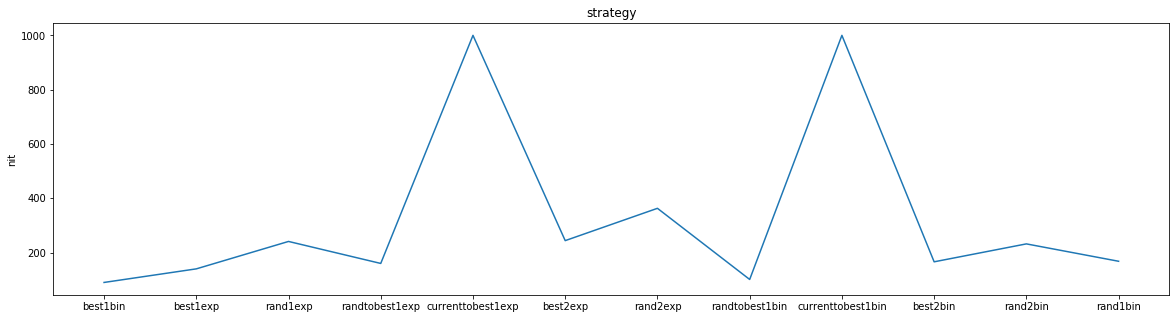

In [301]:
bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
# функция
y = [nit_(x,strat[i]) for i in range(len(strat))]
z =[strat[i] for i in range(len(strat)) ]
    
# рисуем график
plt.plot(z,y)
# показываем график
plt.title('strategy')
plt.ylabel('nit')
plt.show()


In [302]:
result = differential_evolution(ackley, bounds,strategy='randtobest1bin', seed=42)
result
# randtobest1bin Близок по значению, если смотреть на график. Сделаем расчет 
# Все же у метода best1bin оптимальнее значения ( меньше итераций и вычислений функций)


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3123
     nit: 101
 success: True
       x: array([0., 0.])

In [303]:
# Создадим функцию для значения maxiter
def maxiter_ (x,val):
    result = differential_evolution(ackley, bounds,strategy='best1bin', maxiter= int(val), seed=42)
    if result['success'] == True:
        y = result['nit']
    else:
        y = 0
    return y  

In [304]:
val = np.linspace(10,200,100)
x = np.linspace(-10,10,100) # создали вектор х

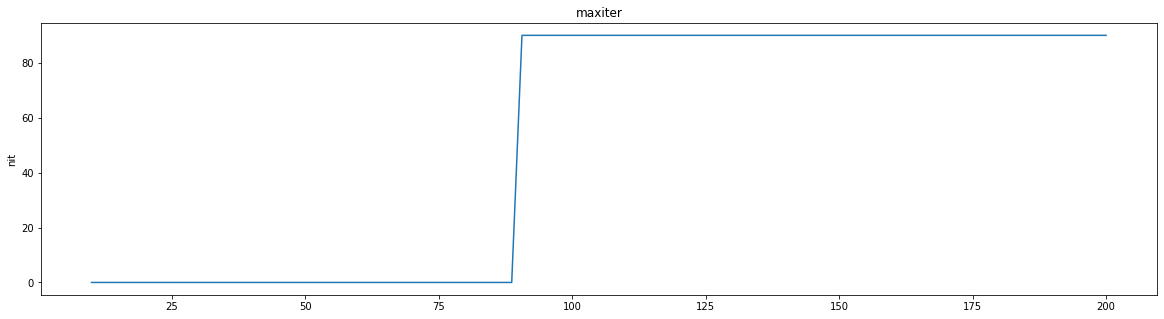

In [305]:
#bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
# функция
y = [maxiter_(x,val[i]) for i in range(len(val))]
z =[val[i] for i in range(len(val)) ]
    
# рисуем график
plt.plot(z ,y)
# показываем график
plt.title('maxiter')
plt.ylabel('nit')
plt.show()

# Наглядно видно, что результат  success: True , мы получили после maxiter = 90, и значение nit осталось не изменным 

In [306]:
# Создадим функцию для значения popsize
def popsize_ (x,val):
    result = differential_evolution(ackley, bounds,strategy='best1bin', maxiter= 90,popsize=val, seed=42)
    if result['success'] == True:
        y = result['nit']
    else:
        y = 0
    return y  

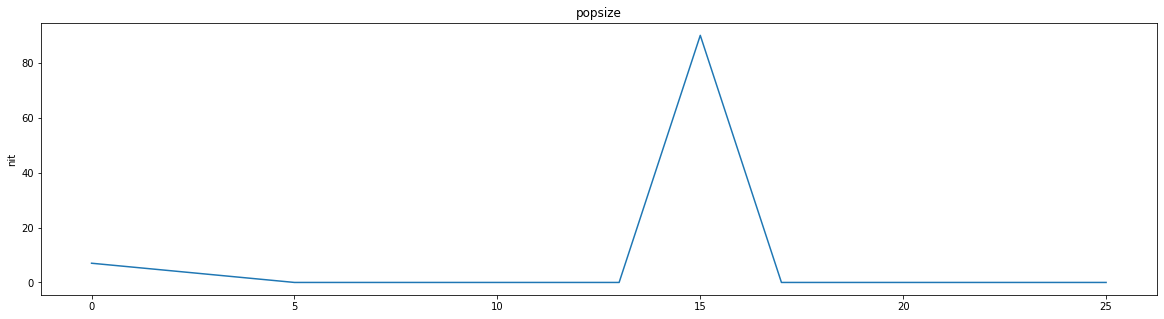

In [307]:
bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
val = (0,5,10,13,15,17,20,25)
# функция
y = [popsize_(x,val[i]) for i in range(len(val))]
z =[val[i] for i in range(len(val)) ]
    
# рисуем график
plt.plot(z ,y)
# показываем график
plt.title('popsize')
plt.ylabel('nit')
plt.show()

# Наглядно видно, что результат  success: True , мы получили при popsize = 15, 

In [308]:
# Создадим функцию для значения tol
def tol_ (x,val):
    result = differential_evolution(ackley, bounds,strategy='best1bin', maxiter= 90,popsize= 15,tol=val, seed=42)
    if result['success'] == True:
        y = result['nit']
    else:
        y = 0
    return y  

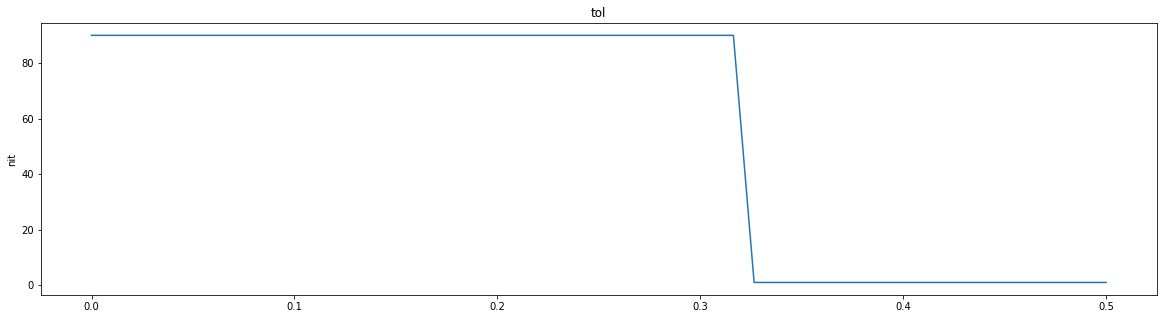

In [309]:
bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
val = np.linspace(0,0.5,50)
# функция
y = [tol_(x,val[i]) for i in range(len(val))]
z =[val[i] for i in range(len(val)) ]
    
# рисуем график
plt.plot(z ,y)
# показываем график
plt.title('tol')
plt.ylabel('nit')
plt.show()

# Наглядно видно, что при результат  success: True , nit принимает значения либо 90 либо 1 

In [310]:
# Создадим функцию для значения mutation
def mutation_ (x,val):
    result = differential_evolution(ackley, bounds,strategy='best1bin', maxiter= 90,popsize= 15,tol=0.05,
    mutation = val, seed=42)
    if result['success'] == True:
        y = result['nit']
    else:
        y = 0
    return y  

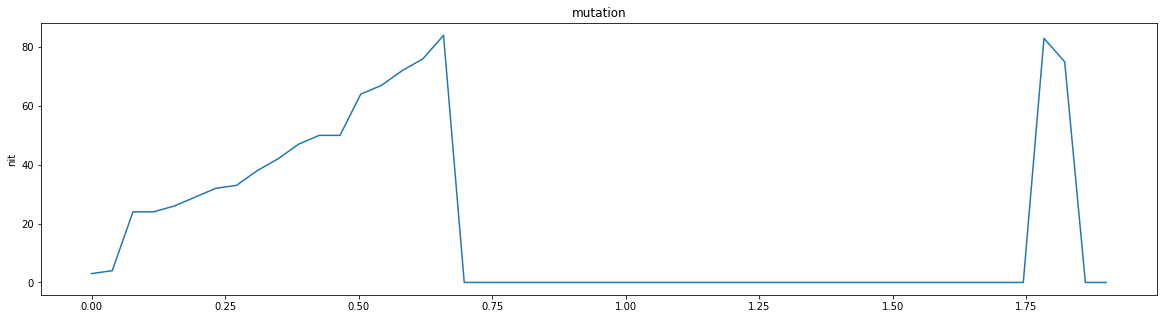

In [311]:
bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
val = np.linspace(0,1.9,50)
# функция
y = [mutation_(x,val[i]) for i in range(len(val))]
z =[val[i] for i in range(len(val)) ]
    
# рисуем график
plt.plot(z ,y)
# показываем график
plt.title('mutation')
plt.ylabel('nit')
plt.show()

#  success: True не на всех значения, мы не учитываем переодически появляющее значение jac . Остановимся на значение 0.15

In [312]:
# Создадим функцию для значения recombination
def recombination_ (x,val):
    result = differential_evolution(ackley, bounds,strategy='best1bin', maxiter= 90,popsize= 15,tol=0.05,
    mutation = 0.15,recombination= val, seed=42)
    if result['success'] == True:
        y = result['nit']
    else:
        y = 0
    return y  

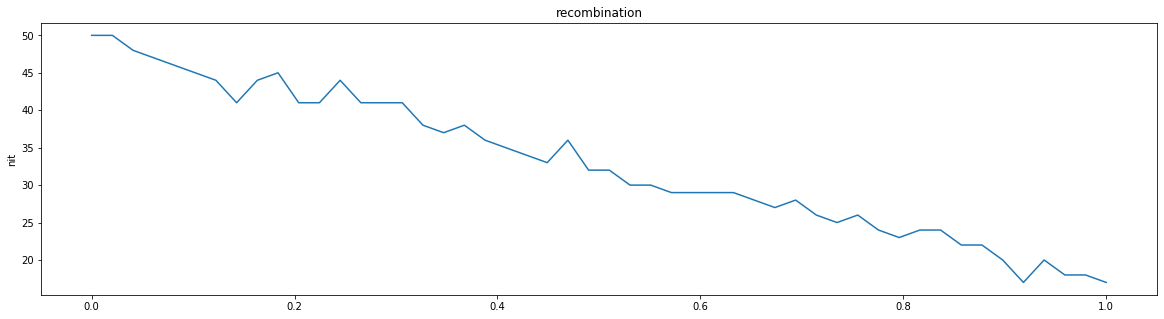

In [313]:
bounds = [(-10, 10), (-10, 10)]# пределы изменения переменных
val = np.linspace(0,1,50)
# функция
y = [recombination_(x,val[i]) for i in range(len(val))]
z =[val[i] for i in range(len(val)) ]
    
# рисуем график
plt.plot(z ,y)
# показываем график
plt.title('recombination')
plt.ylabel('nit')
plt.show()

#  минимальное количество nit при значение 1

**Постройте графики количества итераций оптимизации функции ackley от значения параметра.**

Я получила оптимальный набор параметров для минимального nit

In [314]:
result = differential_evolution(ackley, bounds,strategy='best1bin', maxiter= 90, popsize=15, tol= 0.5,
mutation = 0.15,recombination = 1, seed=42)
result

     fun: 3.9968028886505635e-15
 message: 'Optimization terminated successfully.'
    nfev: 573
     nit: 16
 success: True
       x: array([-1.11022302e-15, -1.11022302e-15])

In [139]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [151]:
# Построю функцию
def ackley (x, y):
    arg1 = -0.2 * np.sqrt(0.5 * (x**2 + y**2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x) + np.cos(2. * np.pi * y))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

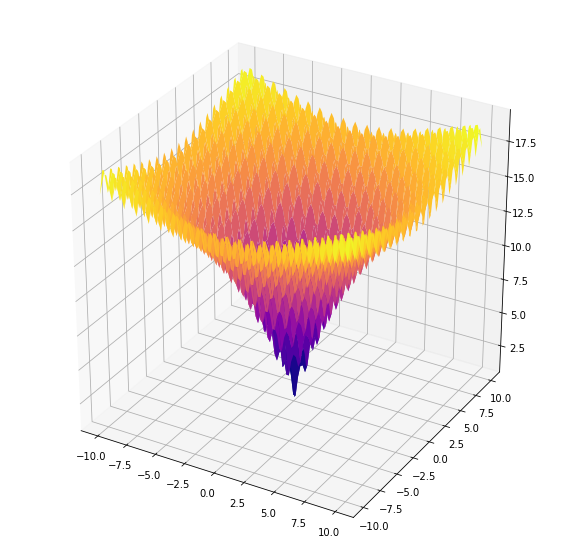

In [152]:
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
xval = np.linspace(-10, 10, 100)
yval = np.linspace(-10, 10, 100)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = ackley(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 5,
cstride = 5,
# цветовая схема plasma
cmap = cm.plasma)


